In [1]:
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.models import vgg16
import torch
import os 
import time

In [2]:
train = "train"
test = "test"
img_size = (224, 224)
img_row_size = img_size[0] * img_size[1]

img_tf = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


train_data = torchvision.datasets.ImageFolder(root = train, transform = img_tf)
test_data = torchvision.datasets.ImageFolder(root = test, transform = img_tf)


train_dl = DataLoader(train_data, batch_size = 8, shuffle=True, num_workers = 4)
test_dl = DataLoader(test_data, batch_size = 8, shuffle=False, num_workers = 4)

In [3]:
print(f'Num training images: {len(train_dl.dataset)}')
print(f'Classes of training images: {os.listdir(train)}\n')
print(f'Num training images: {len(test_dl.dataset)}')
print(f'Classes of testing images: {os.listdir(test)}\n')


Num training images: 16854
Classes of training images: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

Num training images: 5641
Classes of testing images: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


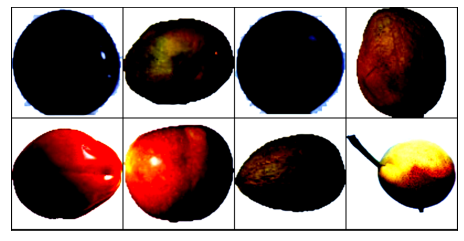

In [4]:
for images, labels in train_dl:
    
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


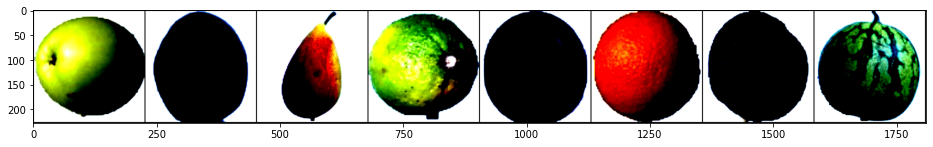

In [5]:
images, labels = iter(train_dl).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(images[:16])
np_grid_imgs = grid_imgs.numpy()

plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [6]:
x, y = next(iter(train_dl))
print(x.shape, y.shape)

torch.Size([8, 3, 224, 224]) torch.Size([8])


In [7]:
n_classes = len(train_data.classes)
print(f'There are {n_classes} different classes.')

len(train_data.classes)



There are 33 different classes.


33

In [8]:
device = 'cuda'

model = vgg16(pretrained = True)

In [9]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
# Freeze early layers
for param in model.parameters():
    param.requires_grad = False



In [11]:
n_inputs = model.classifier[6].in_features

features = list(model.classifier.children())[:-4] 
features.extend([nn.Linear(n_inputs, n_classes)]) # Add layer with 33 outputs
model.classifier = nn.Sequential(*features) # Replace the model classifier
print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
model = model.to(device)
criterion = nn.CrossEntropyLoss()
feature_extract = True
params_to_update = model.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

optimizer = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 classifier.3.weight
	 classifier.3.bias


In [13]:
img = torch.rand(8, 3, 224, 224).to(device)
model(img).shape

torch.Size([8, 33])

In [14]:
def validate(model, test_dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    for int, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        
        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()
    
    val_loss = val_running_loss/len(test_dataloader.dataset)
    val_accuracy = 100. * val_running_correct/len(test_dataloader.dataset)
    print(f'Test Loss: {val_loss:.4f}, Test Acc: {val_accuracy:.2f}')

    return val_loss, val_accuracy

In [15]:
# training function
def fit(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
    train_loss = train_running_loss/len(train_dataloader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_dataloader.dataset)
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')
    
    return train_loss, train_accuracy

In [16]:
train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []

for epoch in range(5):
    print('Epoch: ', epoch)
    train_epoch_loss, train_epoch_accuracy = fit(model, train_dl)
    val_epoch_loss, val_epoch_accuracy = validate(model, test_dl)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


Epoch:  0
Train Loss: 0.0116, Train Acc: 97.62
Test Loss: 0.0029, Test Acc: 99.33
Epoch:  1
Train Loss: 0.0010, Train Acc: 99.85
Test Loss: 0.0024, Test Acc: 99.57
Epoch:  2
Train Loss: 0.0005, Train Acc: 99.94
Test Loss: 0.0016, Test Acc: 99.77
Epoch:  3
Train Loss: 0.0004, Train Acc: 99.93
Test Loss: 0.0017, Test Acc: 99.75
Epoch:  4
Train Loss: 0.0003, Train Acc: 99.96
Test Loss: 0.0015, Test Acc: 99.75


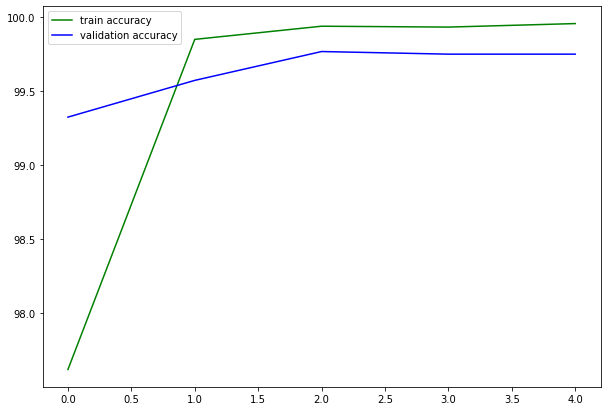

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.legend()
plt.show()

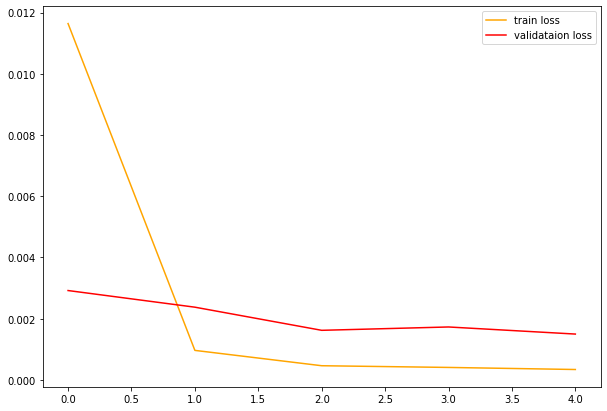

In [18]:

plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.legend()
plt.show()